## Problem statement

1.Segment (Group/Cluster) customer based on their value to the e-commerce company.

2.Identify trends based on the time of shopping.

3.Create recommendation of products to a target customer.

# Importing necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# Importing the dataset

In [2]:
original_data=pd.read_excel('Online_shopping.xlsx')
original_data.head()

,InvoiceNo,StockCode,lower,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,white hanging heart t-light holder,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,white metal lantern,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,cream cupid hearts coat hanger,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,knitted union flag hot water bottle,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,red woolly hottie white heart.,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


# Task #1 - Customer Segmentation based on their value to the e-commerce company.

We will be using RFM metrics to segregate the customers in the dataset.

RFM (Recency, Frequency, Monetary) is a marketing technique used to analyze customer value based on three variables:
Recency: number of days since the last purchase or order.
Frequency: average orders during a certain period (for instance, number of monthly purchases).
Monetary value: total order amount during a specific time frame.

RFM models assign a score to every customer according to these three variables. A ranking is then created. This allows us to create customer segmentation based on their business value, boosting our marketing strategy.

In [3]:
df1=original_data.copy()
df1.head()

,InvoiceNo,StockCode,lower,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,white hanging heart t-light holder,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,white metal lantern,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,cream cupid hearts coat hanger,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,knitted union flag hot water bottle,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,red woolly hottie white heart.,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [4]:
#Dropping irrelevant columns.These columns are not used for calculationg RFM score.
df1.drop(['StockCode','lower','Description','Country'],axis=1,inplace=True)
df1

,InvoiceNo,Quantity,InvoiceDate,UnitPrice,CustomerID
0,536365,6,2010-12-01 08:26:00,2.55,17850.0
1,536365,6,2010-12-01 08:26:00,3.39,17850.0
2,536365,8,2010-12-01 08:26:00,2.75,17850.0
3,536365,6,2010-12-01 08:26:00,3.39,17850.0
4,536365,6,2010-12-01 08:26:00,3.39,17850.0
...,...,...,...,...,...
541904,581587,12,2011-12-09 12:50:00,0.85,12680.0
541905,581587,6,2011-12-09 12:50:00,2.10,12680.0
541906,581587,4,2011-12-09 12:50:00,4.15,12680.0
541907,581587,4,2011-12-09 12:50:00,4.15,12680.0


# Descriptive Analysis

In [5]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 5 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   Quantity     541909 non-null  int64         
 2   InvoiceDate  541909 non-null  datetime64[ns]
 3   UnitPrice    541909 non-null  float64       
 4   CustomerID   406829 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(1)
memory usage: 20.7+ MB


In [6]:
#Handling missing value

In [7]:
df1.isnull().sum()/len(df1)

InvoiceNo      0.000000
Quantity       0.000000
InvoiceDate    0.000000
UnitPrice      0.000000
CustomerID     0.249267
dtype: float64

Missing values in 'CustomerID' column shouldn't be imputed with 'mode' values, as it will put irrelevant customer IDs against Invoice No. . They need to be dropped.

Customer IDs are same for a given Invoice No's in the dataset. Checked if missing Customer IDs can be filled using common Invoice No.s

In [8]:
first_df=df1[df1['CustomerID'].isnull()] # Entries with CustomerID=NaN
first_df

,InvoiceNo,Quantity,InvoiceDate,UnitPrice,CustomerID
622,536414,56,2010-12-01 11:52:00,0.00,NaN
1443,536544,1,2010-12-01 14:32:00,2.51,NaN
1444,536544,2,2010-12-01 14:32:00,2.51,NaN
1445,536544,4,2010-12-01 14:32:00,0.85,NaN
1446,536544,2,2010-12-01 14:32:00,1.66,NaN
...,...,...,...,...,...
541536,581498,5,2011-12-09 10:26:00,4.13,NaN
541537,581498,4,2011-12-09 10:26:00,4.13,NaN
541538,581498,1,2011-12-09 10:26:00,4.96,NaN
541539,581498,1,2011-12-09 10:26:00,10.79,NaN


In [9]:
second_df=df1[df1['CustomerID'].notnull()] # Entries with CustomerID not null
second_df

,InvoiceNo,Quantity,InvoiceDate,UnitPrice,CustomerID
0,536365,6,2010-12-01 08:26:00,2.55,17850.0
1,536365,6,2010-12-01 08:26:00,3.39,17850.0
2,536365,8,2010-12-01 08:26:00,2.75,17850.0
3,536365,6,2010-12-01 08:26:00,3.39,17850.0
4,536365,6,2010-12-01 08:26:00,3.39,17850.0
...,...,...,...,...,...
541904,581587,12,2011-12-09 12:50:00,0.85,12680.0
541905,581587,6,2011-12-09 12:50:00,2.10,12680.0
541906,581587,4,2011-12-09 12:50:00,4.15,12680.0
541907,581587,4,2011-12-09 12:50:00,4.15,12680.0


In [10]:
test=first_df['InvoiceNo'].isin( second_df['InvoiceNo'])
test

622       False
1443      False
1444      False
1445      False
1446      False
          ...  
541536    False
541537    False
541538    False
541539    False
541540    False
Name: InvoiceNo, Length: 135080, dtype: bool

In [11]:
# Customer IDs having missing values don't have common Invoice No.s, so we cannot map/fill missing customer IDs using Invoice No.'s'
# The missing values in Customer ID will be dropped.
test.value_counts()

False    135080
Name: InvoiceNo, dtype: int64

In [12]:
df1.dropna(axis=0,inplace=True)

In [13]:
df1.isnull().sum()

InvoiceNo      0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
dtype: int64

In [14]:
# Observaions:- i) Negative values observed in Quantity column
#              ii) Unit price is obseveded as zero for some entries 
df1.describe()

,Quantity,UnitPrice,CustomerID
count,406829.000000,406829.000000,406829.000000
mean,12.061303,3.460471,15287.690570
std,248.693370,69.315162,1713.600303
min,-80995.000000,0.000000,12346.000000
25%,2.000000,1.250000,13953.000000
50%,5.000000,1.950000,15152.000000
75%,12.000000,3.750000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [15]:
# Negative values in shopping dataset for 'Quantity' column indicates return items.
# Zero values in shopping dataset for 'UnitPrice' column indicates free items.

In [16]:
# Return item entries (Negative quantity) will be considered 'No business' entries and will be dropped.
# Assuming the items were returned due to genuine reasons such as defective product etc.The entries which are 
# related to buying of products,before they were retuned, will be not be dropped. Ensuring data of potential customer is not lost.
df1=df1[df1['Quantity']>0]

In [17]:
df1.describe()

,Quantity,UnitPrice,CustomerID
count,397924.000000,397924.000000,397924.000000
mean,13.021823,3.116174,15294.315171
std,180.420210,22.096788,1713.169877
min,1.000000,0.000000,12346.000000
25%,2.000000,1.250000,13969.000000
50%,6.000000,1.950000,15159.000000
75%,12.000000,3.750000,16795.000000
max,80995.000000,8142.750000,18287.000000


In [18]:
# Creating new column 'Total' using existing columns
df1['Total']=df1['Quantity']*df1['UnitPrice']
df1

,InvoiceNo,Quantity,InvoiceDate,UnitPrice,CustomerID,Total
0,536365,6,2010-12-01 08:26:00,2.55,17850.0,15.30
1,536365,6,2010-12-01 08:26:00,3.39,17850.0,20.34
2,536365,8,2010-12-01 08:26:00,2.75,17850.0,22.00
3,536365,6,2010-12-01 08:26:00,3.39,17850.0,20.34
4,536365,6,2010-12-01 08:26:00,3.39,17850.0,20.34
...,...,...,...,...,...,...
541904,581587,12,2011-12-09 12:50:00,0.85,12680.0,10.20
541905,581587,6,2011-12-09 12:50:00,2.10,12680.0,12.60
541906,581587,4,2011-12-09 12:50:00,4.15,12680.0,16.60
541907,581587,4,2011-12-09 12:50:00,4.15,12680.0,16.60


In [19]:
df2=df1.drop(['Quantity','UnitPrice'],axis=1)
df2

,InvoiceNo,InvoiceDate,CustomerID,Total
0,536365,2010-12-01 08:26:00,17850.0,15.30
1,536365,2010-12-01 08:26:00,17850.0,20.34
2,536365,2010-12-01 08:26:00,17850.0,22.00
3,536365,2010-12-01 08:26:00,17850.0,20.34
4,536365,2010-12-01 08:26:00,17850.0,20.34
...,...,...,...,...
541904,581587,2011-12-09 12:50:00,12680.0,10.20
541905,581587,2011-12-09 12:50:00,12680.0,12.60
541906,581587,2011-12-09 12:50:00,12680.0,16.60
541907,581587,2011-12-09 12:50:00,12680.0,16.60


In [20]:
#Merging all the repeated 'InvoiceNo','InvoiceDate' and 'CustomerID' entries into one entry while sum up all the entries in 'Total' column
df_final=df2.groupby(['InvoiceNo','InvoiceDate','CustomerID']).agg({'Total':'sum'}).reset_index()

In [21]:
# Now the data is in a form where we can start preparing RFM score for the customers.
df_final

,InvoiceNo,InvoiceDate,CustomerID,Total
0,536365,2010-12-01 08:26:00,17850.0,139.12
1,536366,2010-12-01 08:28:00,17850.0,22.20
2,536367,2010-12-01 08:34:00,13047.0,278.73
3,536368,2010-12-01 08:34:00,13047.0,70.05
4,536369,2010-12-01 08:35:00,13047.0,17.85
...,...,...,...,...
18561,581583,2011-12-09 12:23:00,13777.0,124.60
18562,581584,2011-12-09 12:25:00,13777.0,140.64
18563,581585,2011-12-09 12:31:00,15804.0,329.05
18564,581586,2011-12-09 12:49:00,13113.0,339.20


## Calculation RFM scores

In [22]:
# Formulae for calculation RFM scores
# Recency = Latest date (also last date of shopping in the dataset)  minus last Invoice Date of a customer
# Frequency = No. of time customer has shopped (i,e Count of Invoice ID for a customer)
# Monetory = Sum of total money spent (i,e Sum of 'Total column for a customer')

In [23]:
# Calculating the 'Latest Date' for Recency calculations
# 1. First we need to find the last date a customer has shopped in our data set
max(df_final['InvoiceDate'])

Timestamp('2011-12-09 12:50:00')

In [24]:
import datetime as dt
latest_date=dt.datetime(2011,12,10) # Taken one day extra to have recency score in terms of days and to prevent values in hours and minutes,if shopping done in the last date of the dataset.
latest_date

datetime.datetime(2011, 12, 10, 0, 0)

In [25]:
# Creating a new dataframe 'RFM_Score' by performing operations in the columns of 'df_final'
RFM_Score=df_final.groupby('CustomerID').agg({'InvoiceDate':lambda x:(latest_date-x.max()).days,
                                              'InvoiceNo':lambda x:x.count(),
                                              'Total': lambda x:x.sum()
                                             }).reset_index()

In [26]:
RFM_Score.head()

,CustomerID,InvoiceDate,InvoiceNo,Total
0,12346.0,325,1,77183.60
1,12347.0,2,7,4310.00
2,12348.0,75,4,1797.24
3,12349.0,18,1,1757.55
4,12350.0,310,1,334.40


In [27]:
# Finally renaming the columns appropriately
RFM_Score=RFM_Score.rename(columns={'InvoiceDate':'Recency','InvoiceNo':'Frequency','Total':'Monetory'})

In [28]:
# Making a copy of RFM_Score
RFM1=RFM_Score.copy()

In [29]:
# Assigning ranking based on R,F & M scores
RFM1['R_Rank']=RFM1['Recency'].rank(ascending=False)
RFM1['F_Rank']=RFM1['Frequency'].rank(ascending=True)
RFM1['M_Rank']=RFM1['Monetory'].rank(ascending=True)

In [30]:
RFM1

,CustomerID,Recency,Frequency,Monetory,R_Rank,F_Rank,M_Rank
0,12346.0,325,1,77183.60,162.5,746.5,4330.0
1,12347.0,2,7,4310.00,4156.5,3709.5,4004.0
2,12348.0,75,4,1797.24,1646.0,3028.0,3334.0
3,12349.0,18,1,1757.55,3209.5,746.5,3306.0
4,12350.0,310,1,334.40,227.5,746.5,1230.0
...,...,...,...,...,...,...,...
4334,18280.0,277,1,180.60,355.0,746.5,564.0
4335,18281.0,180,1,80.82,860.0,746.5,105.0
4336,18282.0,7,2,178.05,3839.5,1910.5,547.0
4337,18283.0,3,16,2094.88,4064.5,4182.5,3489.0


In [31]:
# Changing these values into percentile form so as to arrange them (scores) on a scale of 0 to 100.
RFM1['R_final']=(RFM1['R_Rank']/RFM1['R_Rank'].max())*100
RFM1['F_final']=(RFM1['F_Rank']/RFM1['F_Rank'].max())*100
RFM1['M_final']=(RFM1['M_Rank']/RFM1['M_Rank'].max())*100

In [32]:
RFM1

,CustomerID,Recency,Frequency,Monetory,R_Rank,F_Rank,M_Rank,R_final,F_final,M_final
0,12346.0,325,1,77183.60,162.5,746.5,4330.0,3.759833,17.204425,99.792579
1,12347.0,2,7,4310.00,4156.5,3709.5,4004.0,96.170754,85.492049,92.279327
2,12348.0,75,4,1797.24,1646.0,3028.0,3334.0,38.084220,69.785665,76.837981
3,12349.0,18,1,1757.55,3209.5,746.5,3306.0,74.259602,17.204425,76.192671
4,12350.0,310,1,334.40,227.5,746.5,1230.0,5.263767,17.204425,28.347546
...,...,...,...,...,...,...,...,...,...,...
4334,18280.0,277,1,180.60,355.0,746.5,564.0,8.213790,17.204425,12.998387
4335,18281.0,180,1,80.82,860.0,746.5,105.0,19.898195,17.204425,2.419912
4336,18282.0,7,2,178.05,3839.5,1910.5,547.0,88.836187,44.030883,12.606591
4337,18283.0,3,16,2094.88,4064.5,4182.5,3489.0,94.042110,96.393178,80.410233


In [33]:
# Dropping R_Rank,F_Rank and M_Rank columns
RFM1.drop(columns=['R_Rank','F_Rank','M_Rank'],inplace=True)
RFM1

,CustomerID,Recency,Frequency,Monetory,R_final,F_final,M_final
0,12346.0,325,1,77183.60,3.759833,17.204425,99.792579
1,12347.0,2,7,4310.00,96.170754,85.492049,92.279327
2,12348.0,75,4,1797.24,38.084220,69.785665,76.837981
3,12349.0,18,1,1757.55,74.259602,17.204425,76.192671
4,12350.0,310,1,334.40,5.263767,17.204425,28.347546
...,...,...,...,...,...,...,...
4334,18280.0,277,1,180.60,8.213790,17.204425,12.998387
4335,18281.0,180,1,80.82,19.898195,17.204425,2.419912
4336,18282.0,7,2,178.05,88.836187,44.030883,12.606591
4337,18283.0,3,16,2094.88,94.042110,96.393178,80.410233


In [34]:
# For claculating the combined RFM score , we need to provide the weightage for each R,F & M score.
# The weightage for R,F & M can be decided based on domain knowledge or stakeholders recommendation or the type of shopping dataset (i,e if the dataset belng to FMCG products or high capital goods etc)
RFM1['RFM_Sum']= RFM1['R_final']*0.15+RFM1['F_final']*0.30+RFM1['M_final']*0.60

In [35]:
RFM1.head()

,CustomerID,Recency,Frequency,Monetory,R_final,F_final,M_final,RFM_Sum
0,12346.0,325,1,77183.60,3.759833,17.204425,99.792579,65.600850
1,12347.0,2,7,4310.00,96.170754,85.492049,92.279327,95.440824
2,12348.0,75,4,1797.24,38.084220,69.785665,76.837981,72.751121
3,12349.0,18,1,1757.55,74.259602,17.204425,76.192671,62.015870
4,12350.0,310,1,334.40,5.263767,17.204425,28.347546,22.959420


In [36]:
#Rounding off to  decimal values
RFM1=RFM1.round(2)
RFM1.head()

,CustomerID,Recency,Frequency,Monetory,R_final,F_final,M_final,RFM_Sum
0,12346.0,325,1,77183.60,3.76,17.20,99.79,65.60
1,12347.0,2,7,4310.00,96.17,85.49,92.28,95.44
2,12348.0,75,4,1797.24,38.08,69.79,76.84,72.75
3,12349.0,18,1,1757.55,74.26,17.20,76.19,62.02
4,12350.0,310,1,334.40,5.26,17.20,28.35,22.96


In [37]:
max(RFM1["RFM_Sum"])

104.92

In [38]:
min(RFM1["RFM_Sum"])

5.36

### Customer Segmentation - i) Manual approach using quantile function

In [39]:
# Creating 4 groups to segregate
loyality_group=['Silver','Gold','Diamond','Platinum']

In [40]:
# Creating benchmark for each group
RFM1['RFM_Sum'].quantile([0.25,0.5,0.75])

0.25    28.365
0.50    51.290
0.75    75.885
Name: RFM_Sum, dtype: float64

In [41]:
# Using a user defined function for segragation of customer based on benchmark 
def loyality(x):
    if x<=28:
        return 'Silver'
    elif x<=51:
        return 'Gold'
    elif x<=75:
        return 'Diamond'
    else:
        return 'Platinum'   

In [42]:
RFM1['Loyality']=RFM1['RFM_Sum'].apply(loyality)

In [43]:
RFM1

,CustomerID,Recency,Frequency,Monetory,R_final,F_final,M_final,RFM_Sum,Loyality
0,12346.0,325,1,77183.60,3.76,17.20,99.79,65.60,Diamond
1,12347.0,2,7,4310.00,96.17,85.49,92.28,95.44,Platinum
2,12348.0,75,4,1797.24,38.08,69.79,76.84,72.75,Diamond
3,12349.0,18,1,1757.55,74.26,17.20,76.19,62.02,Diamond
4,12350.0,310,1,334.40,5.26,17.20,28.35,22.96,Silver
...,...,...,...,...,...,...,...,...,...
4334,18280.0,277,1,180.60,8.21,17.20,13.00,14.19,Silver
4335,18281.0,180,1,80.82,19.90,17.20,2.42,9.60,Silver
4336,18282.0,7,2,178.05,88.84,44.03,12.61,34.10,Gold
4337,18283.0,3,16,2094.88,94.04,96.39,80.41,91.27,Platinum


In [44]:
# Segmentation of customers
RFM1['Loyality'].value_counts()

Platinum    1127
Gold        1098
Silver      1060
Diamond     1054
Name: Loyality, dtype: int64

In [45]:
RFM1['Loyality'].value_counts(normalize=True)

Platinum    0.259737
Gold        0.253054
Silver      0.244296
Diamond     0.242913
Name: Loyality, dtype: float64

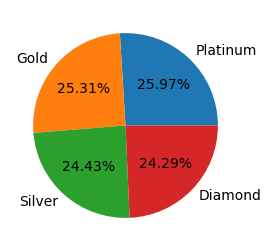

In [46]:
plt.figure(figsize=(3,3))
plt.pie(RFM1['Loyality'].value_counts(),autopct='%0.02f%%',labels=RFM1['Loyality'].value_counts().index)
plt.show()

### Customer Segmentation - ii) Using unsupervised machine learning method ( K means )

In [47]:
New_data=RFM1["RFM_Sum"]
New_data=pd.DataFrame(RFM1["RFM_Sum"])

In [48]:
from sklearn.cluster import KMeans

In [49]:
kmean1=KMeans(n_clusters=4,max_iter=100,random_state=10)

In [50]:
y_means=kmean1.fit_predict(New_data)
y_means

array([3, 0, 3, ..., 1, 0, 3])

In [51]:
RFM1['clusters']=y_means
RFM1.head(100)

,CustomerID,Recency,Frequency,Monetory,R_final,F_final,M_final,RFM_Sum,Loyality,clusters
0,12346.0,325,1,77183.60,3.76,17.20,99.79,65.60,Diamond,3
1,12347.0,2,7,4310.00,96.17,85.49,92.28,95.44,Platinum,0
2,12348.0,75,4,1797.24,38.08,69.79,76.84,72.75,Diamond,3
3,12349.0,18,1,1757.55,74.26,17.20,76.19,62.02,Diamond,3
4,12350.0,310,1,334.40,5.26,17.20,28.35,22.96,Silver,2
...,...,...,...,...,...,...,...,...,...,...
95,12462.0,18,2,1189.59,74.26,44.03,66.47,64.23,Diamond,3
96,12463.0,53,4,1344.78,48.37,69.79,69.81,70.08,Diamond,3
97,12464.0,10,8,1212.05,83.64,88.22,66.88,79.14,Platinum,0
98,12465.0,17,2,742.19,75.72,44.03,53.24,56.51,Diamond,3


In [52]:
# Segmentation of customers
RFM1['clusters'].value_counts(normalize=True)

2    0.288085
1    0.255128
3    0.239456
0    0.217331
Name: clusters, dtype: float64

In [53]:
RFM1['clusters'].size

4339

In [54]:
# Evaluation of cluster

In [55]:
from sklearn.metrics import silhouette_score

In [56]:
# The silhouette score ranges from -1 to 1, where a score close to 1 indicates that the object is well matched to its own cluster and poorly matched to neighboring clusters.
print(silhouette_score(New_data,y_means))

0.5649352983403836


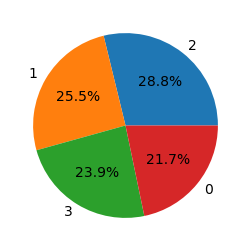

In [57]:
plt.figure(figsize=(3,3))
plt.pie(RFM1['clusters'].value_counts(),autopct='%0.01f%%',labels=RFM1['clusters'].value_counts().index)
plt.show()

# Task #2 - Identify trends based on the time of shopping

In [58]:
import datetime as dt

In [59]:
df_time=df_final.copy()

In [60]:
df_time['Day']=df_final['InvoiceDate'].dt.day_name()
df_time['Month']=df_final['InvoiceDate'].dt.month
df_time['Hour']=df_final['InvoiceDate'].dt.hour

In [61]:
df_time['Week_info']=np.where((df_time.Day=='Saturday')|(df_time.Day=='Sunday'),"Weekend",'Weekday')

In [62]:
df_time

,InvoiceNo,InvoiceDate,CustomerID,Total,Day,Month,Hour,Week_info
0,536365,2010-12-01 08:26:00,17850.0,139.12,Wednesday,12,8,Weekday
1,536366,2010-12-01 08:28:00,17850.0,22.20,Wednesday,12,8,Weekday
2,536367,2010-12-01 08:34:00,13047.0,278.73,Wednesday,12,8,Weekday
3,536368,2010-12-01 08:34:00,13047.0,70.05,Wednesday,12,8,Weekday
4,536369,2010-12-01 08:35:00,13047.0,17.85,Wednesday,12,8,Weekday
...,...,...,...,...,...,...,...,...
18561,581583,2011-12-09 12:23:00,13777.0,124.60,Friday,12,12,Weekday
18562,581584,2011-12-09 12:25:00,13777.0,140.64,Friday,12,12,Weekday
18563,581585,2011-12-09 12:31:00,15804.0,329.05,Friday,12,12,Weekday
18564,581586,2011-12-09 12:49:00,13113.0,339.20,Friday,12,12,Weekday


In [63]:
df_time

,InvoiceNo,InvoiceDate,CustomerID,Total,Day,Month,Hour,Week_info
0,536365,2010-12-01 08:26:00,17850.0,139.12,Wednesday,12,8,Weekday
1,536366,2010-12-01 08:28:00,17850.0,22.20,Wednesday,12,8,Weekday
2,536367,2010-12-01 08:34:00,13047.0,278.73,Wednesday,12,8,Weekday
3,536368,2010-12-01 08:34:00,13047.0,70.05,Wednesday,12,8,Weekday
4,536369,2010-12-01 08:35:00,13047.0,17.85,Wednesday,12,8,Weekday
...,...,...,...,...,...,...,...,...
18561,581583,2011-12-09 12:23:00,13777.0,124.60,Friday,12,12,Weekday
18562,581584,2011-12-09 12:25:00,13777.0,140.64,Friday,12,12,Weekday
18563,581585,2011-12-09 12:31:00,15804.0,329.05,Friday,12,12,Weekday
18564,581586,2011-12-09 12:49:00,13113.0,339.20,Friday,12,12,Weekday


In [64]:
# analysing the business as per day
day_count=df_time.groupby("Day")["InvoiceNo"].count().to_frame("count_of_invoices").reset_index()

In [65]:
day_count

,Day,count_of_invoices
0,Friday,2835
1,Monday,2865
2,Sunday,2177
3,Thursday,4038
4,Tuesday,3189
5,Wednesday,3462


In [66]:
# function to create season and timing
def cal_season(x):
    if x in [10,11,12,1]:
        return "Winter"
    if x in [2,3]:
        return "spring"
    if x in [4,5,6]:
        return "Summer"
    else:
        return "Monsoon"

In [67]:
def cal_timing(x):
    if x in range(4,7):
        return "early morning"
    elif x in range(7,11):
        return "Morning"
    elif x in range(11,16):
        return "afternoon"
    else:
        return "evening"

In [68]:
df_time["season"]=df_time["Month"].apply(cal_season)
df_time["Time"]=df_time["Hour"].apply(cal_timing)

In [69]:
df_time

,InvoiceNo,InvoiceDate,CustomerID,Total,Day,Month,Hour,Week_info,season,Time
0,536365,2010-12-01 08:26:00,17850.0,139.12,Wednesday,12,8,Weekday,Winter,Morning
1,536366,2010-12-01 08:28:00,17850.0,22.20,Wednesday,12,8,Weekday,Winter,Morning
2,536367,2010-12-01 08:34:00,13047.0,278.73,Wednesday,12,8,Weekday,Winter,Morning
3,536368,2010-12-01 08:34:00,13047.0,70.05,Wednesday,12,8,Weekday,Winter,Morning
4,536369,2010-12-01 08:35:00,13047.0,17.85,Wednesday,12,8,Weekday,Winter,Morning
...,...,...,...,...,...,...,...,...,...,...
18561,581583,2011-12-09 12:23:00,13777.0,124.60,Friday,12,12,Weekday,Winter,afternoon
18562,581584,2011-12-09 12:25:00,13777.0,140.64,Friday,12,12,Weekday,Winter,afternoon
18563,581585,2011-12-09 12:31:00,15804.0,329.05,Friday,12,12,Weekday,Winter,afternoon
18564,581586,2011-12-09 12:49:00,13113.0,339.20,Friday,12,12,Weekday,Winter,afternoon


In [70]:
season_count = df_time.groupby('season')['InvoiceNo'].count().to_frame('count_of_invoices')

In [71]:
season_count.reset_index(inplace=True)

In [72]:
season_count

,season,count_of_invoices
0,Monsoon,4371
1,Summer,4106
2,Winter,7762
3,spring,2327


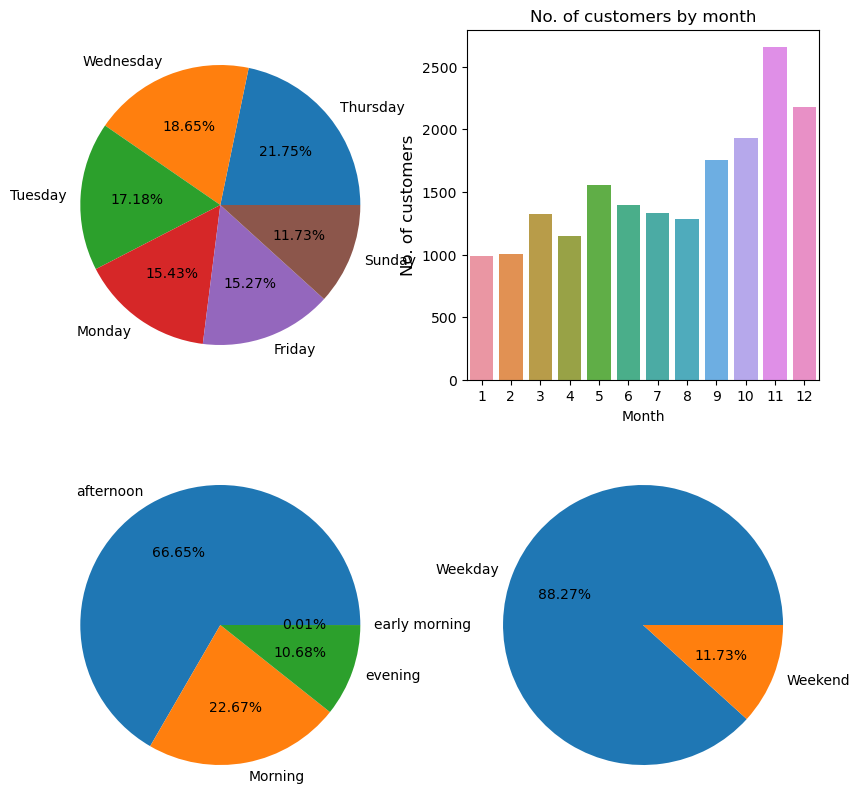

In [73]:
 # Trend analysis
plt.subplots(2,2,figsize=(10,10))

plt.subplot(2,2,1)
plt.pie(df_time['Day'].value_counts(),autopct='%0.2f%%',labels=df_time['Day'].value_counts().index)

plt.subplot(2,2,2)
sns.countplot(x='Month',data=df_time)
plt.title("No. of customers by month")
plt.ylabel("No. of customers",fontsize=12)

plt.subplot(2,2,3)
plt.pie(df_time['Time'].value_counts(),autopct='%0.2f%%',labels=df_time['Time'].value_counts().index)

plt.subplot(2,2,4)
plt.pie(df_time['Week_info'].value_counts(),autopct='%0.2f%%',labels=df_time['Week_info'].value_counts().index);

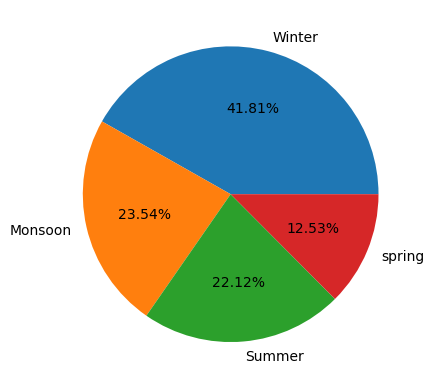

In [74]:
plt.pie(df_time['season'].value_counts(),autopct='%0.2f%%',labels=df_time['season'].value_counts().index);

# Task #3 Create recommendation of products to a target customer.

Recommendation Engine:- A recommendation engine is a data filtering system that operates on different machine learning algorithms to recommend products, services, and information to users based on data analysis. It works on the principle of finding patterns in customer behavior data employing a variety of factors such as customer preferences, past transaction history, attributes, or situational context.

There are different types of recommendation engines in machine learning, we will be using Collaborative Filtering trchnique for this project.

Collaborative Filtering:
The collaborative filtering method collects and analyzes data on user behavior, online activities, and preferences to predict what they will like based on the similarity with other users. It uses a matrix-style formula to plot and calculates these similarities.

In [75]:
df10=original_data.copy()
df10.head()

,InvoiceNo,StockCode,lower,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,white hanging heart t-light holder,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,white metal lantern,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,cream cupid hearts coat hanger,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,knitted union flag hot water bottle,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,red woolly hottie white heart.,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [76]:
df10.drop('lower',axis=1,inplace=True)
df10

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [77]:
df10.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [78]:
df10.dropna(axis=0,inplace=True)

In [79]:
df10.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [80]:
df10.shape

(406829, 8)

In [81]:
# Key Steps:
# step 1-- create a pivot_table
# step 2-- apply cosine_similarity function on pivot_table

In [82]:
custI_matrix=df10.pivot_table(index="CustomerID",columns="StockCode",values="Quantity",aggfunc="sum",fill_value=0)

In [83]:
custI_matrix

StockCode,10002,10080,10120,10125,10133,10135,11001,15030,15034,15036,...,90214Y,90214Z,BANK CHARGES,C2,CRUK,D,DOT,M,PADS,POST
CustomerID,,,,,,,,,,,,,,,,,,,,,
12346.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12347.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12348.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,9
12349.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
12350.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18280.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
18281.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
18282.0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [84]:
# we want to see the similarity of customers based on the products they have brought

In [85]:
from sklearn.metrics.pairwise import cosine_similarity

In [86]:
similarity=cosine_similarity(custI_matrix)

In [87]:
similarity

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 1.        , 0.14887891, ..., 0.01192112, 0.07451023,
        0.10894226],
       [0.        , 0.14887891, 1.        , ..., 0.        , 0.17517012,
        0.11009593],
       ...,
       [0.        , 0.01192112, 0.        , ..., 1.        , 0.00377618,
        0.        ],
       [0.        , 0.07451023, 0.17517012, ..., 0.00377618, 1.        ,
        0.04444524],
       [0.        , 0.10894226, 0.11009593, ..., 0.        , 0.04444524,
        1.        ]])

In [88]:
similarity.shape

(4372, 4372)

In [89]:
final=pd.DataFrame(similarity)
final

,0,1,2,3,4,5,6,7,8,9,...,4362,4363,4364,4365,4366,4367,4368,4369,4370,4371
0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.0,1.000000,0.148879,0.020750,0.014435,0.034833,0.0,0.023478,0.506252,0.186107,...,0.0,0.0,0.407060,-0.001245,0.015133,0.037236,0.000000,0.011921,0.074510,0.108942
2,0.0,0.148879,1.000000,0.000169,0.000315,0.001578,0.0,0.010634,0.286226,0.226244,...,0.0,0.0,0.168758,0.000000,0.000000,0.000000,0.000000,0.000000,0.175170,0.110096
3,0.0,0.020750,0.000169,1.000000,0.030121,0.136488,0.0,0.004931,0.000180,0.150819,...,0.0,0.0,0.000000,-0.000344,0.015680,0.000000,0.000000,0.014689,0.065295,0.022576
4,0.0,0.014435,0.000315,0.030121,1.000000,0.001938,0.0,0.000000,0.000000,0.001179,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.019385,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4367,0.0,0.037236,0.000000,0.000000,0.000000,0.000000,0.0,0.002707,0.000000,0.000000,...,0.0,0.0,0.000000,0.000000,0.043042,1.000000,0.098363,0.000000,0.000000,0.000000
4368,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000435,0.000000,0.000000,...,0.0,0.0,0.000000,0.000000,0.000000,0.098363,1.000000,0.000000,0.098201,0.000000
4369,0.0,0.011921,0.000000,0.014689,0.000000,0.002966,0.0,0.000000,0.007169,0.004772,...,0.0,0.0,0.000000,-0.001372,0.000000,0.000000,0.000000,1.000000,0.003776,0.000000
4370,0.0,0.074510,0.175170,0.065295,0.019385,0.017238,0.0,0.104890,0.050042,0.063930,...,0.0,0.0,0.032142,0.070999,0.000000,0.000000,0.098201,0.003776,1.000000,0.044445


In [90]:
# we need to set the customerid at rows and columns

In [91]:
final.columns=custI_matrix.index

In [92]:
final["customerID"]=custI_matrix.index

In [93]:
final=final.set_index("customerID")

In [94]:
final

CustomerID,12346.0,12347.0,12348.0,12349.0,12350.0,12352.0,12353.0,12354.0,12355.0,12356.0,...,18273.0,18274.0,18276.0,18277.0,18278.0,18280.0,18281.0,18282.0,18283.0,18287.0
customerID,,,,,,,,,,,,,,,,,,,,,
12346.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
12347.0,0.0,1.000000,0.148879,0.020750,0.014435,0.034833,0.0,0.023478,0.506252,0.186107,...,0.0,0.0,0.407060,-0.001245,0.015133,0.037236,0.000000,0.011921,0.074510,0.108942
12348.0,0.0,0.148879,1.000000,0.000169,0.000315,0.001578,0.0,0.010634,0.286226,0.226244,...,0.0,0.0,0.168758,0.000000,0.000000,0.000000,0.000000,0.000000,0.175170,0.110096
12349.0,0.0,0.020750,0.000169,1.000000,0.030121,0.136488,0.0,0.004931,0.000180,0.150819,...,0.0,0.0,0.000000,-0.000344,0.015680,0.000000,0.000000,0.014689,0.065295,0.022576
12350.0,0.0,0.014435,0.000315,0.030121,1.000000,0.001938,0.0,0.000000,0.000000,0.001179,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.019385,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18280.0,0.0,0.037236,0.000000,0.000000,0.000000,0.000000,0.0,0.002707,0.000000,0.000000,...,0.0,0.0,0.000000,0.000000,0.043042,1.000000,0.098363,0.000000,0.000000,0.000000
18281.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000435,0.000000,0.000000,...,0.0,0.0,0.000000,0.000000,0.000000,0.098363,1.000000,0.000000,0.098201,0.000000
18282.0,0.0,0.011921,0.000000,0.014689,0.000000,0.002966,0.0,0.000000,0.007169,0.004772,...,0.0,0.0,0.000000,-0.001372,0.000000,0.000000,0.000000,1.000000,0.003776,0.000000


In [95]:
# above matrix is the degree of similarity among the customers. we can use it for Recommendation

In [96]:
# for example reference cust id 12350.0

In [97]:
final.loc[12350.0].sort_values(ascending=False)

CustomerID
12350.0    1.000000
15180.0    0.337317
15422.0    0.336127
13455.0    0.228141
15435.0    0.214309
             ...   
16217.0   -0.000602
18270.0   -0.000618
16252.0   -0.047206
14304.0   -0.053090
17548.0   -0.054147
Name: 12350.0, Length: 4372, dtype: float64

In [98]:
# CUSTOMER A--12350.0
item_cust_A=set(custI_matrix.loc[12350.0].set(custI_matrix.loc[12350.0].to_numpy().nonzero()].index)

In [99]:
item_cust_A

{20615,
 20652,
 21171,
 21832,
 21864,
 21866,
 21908,
 21915,
 22348,
 22412,
 22551,
 22557,
 22620,
 '79066K',
 '79191C',
 '84086C',
 'POST'}

In [100]:
# CUSTOMER B--15180.0
item_cust_B=set(custI_matrix.loc[15180.0].iloc[custI_matrix.loc[15180.0].to_numpy().nonzero()].index)

In [101]:
item_cust_B

{22112, 22113, 22114, 22348, 22835, 72741}

In [102]:
Recommended_item_list_cust_A=item_cust_B-item_cust_A
Recommended_item_list_cust_A

{22112, 22113, 22114, 22835, 72741}

In [103]:
#Recommendation of items to customer A
df10.loc[df10["StockCode"].isin(item_cust_B),["StockCode","Description"]].drop_duplicates().set_index("StockCode")

,Description
StockCode,
22114,HOT WATER BOTTLE TEA AND SYMPATHY
22835,HOT WATER BOTTLE I AM SO POORLY
22112,CHOCOLATE HOT WATER BOTTLE
22113,GREY HEART HOT WATER BOTTLE
72741,GRAND CHOCOLATECANDLE
22348,TEA BAG PLATE RED RETROSPOT
